In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [25]:
df = pd.read_csv('ObesityData.csv')

In [26]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [27]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [28]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [29]:
df.shape

(2111, 17)

In [30]:
for i in df.select_dtypes(exclude = ['object']).columns:
    if i == 'Height':
        df[i] = df[i].round(2)
    elif i == 'Weight':
        df[i] = df[i].round(1)
    else:
        df[i] = df[i].round(0)

In [31]:
df['Age'] = df['Age'].astype('int64')
df['FCVC'] = df['FCVC'].astype('int64')
df['NCP'] = df['NCP'].astype('int64')
df['FAF'] = df['FAF'].astype('int64')
df['TUE'] = df['TUE'].astype('int64')

In [32]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2.0,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3.0,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2.0,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2.0,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2.0,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [33]:
for i in df.columns:
    print(i)
    print("----------")
    print(set(df[i].tolist()))
    print("............")

Gender
----------
{'Male', 'Female'}
............
Age
----------
{14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 55, 56, 61}
............
Height
----------
{1.62, 1.78, 1.8, 1.52, 1.5, 1.64, 1.72, 1.85, 1.65, 1.77, 1.75, 1.58, 1.67, 1.83, 1.92, 1.93, 1.68, 1.76, 1.84, 1.59, 1.51, 1.69, 1.6, 1.94, 1.7, 1.53, 1.61, 1.86, 1.45, 1.95, 1.71, 1.79, 1.63, 1.88, 1.87, 1.54, 1.46, 1.55, 1.89, 1.56, 1.81, 1.73, 1.48, 1.9, 1.98, 1.66, 1.82, 1.57, 1.74, 1.91, 1.49}
............
Weight
----------
{131.4, 39.0, 40.0, 41.3, 42.0, 42.3, 44.0, 45.0, 44.8, 47.0, 48.0, 49.0, 50.4, 50.0, 51.0, 52.0, 53.0, 54.5, 55.3, 55.0, 56.0, 57.0, 59.0, 59.8, 58.0, 58.5, 60.0, 64.4, 61.0, 67.8, 66.5, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 72.0, 71.0, 74.0, 75.0, 76.0, 81.0, 77.0, 78.0, 79.0, 80.0, 82.0, 83.0, 84.0, 85.0, 85.5, 87.0, 88.0, 89.8, 90.0, 91.0, 93.0, 93.5, 95.0, 94.0, 96.0, 98.0, 104.6, 104.8

In [34]:
def distplots(cols):
    sn.displot(df[cols])
    plt.show()

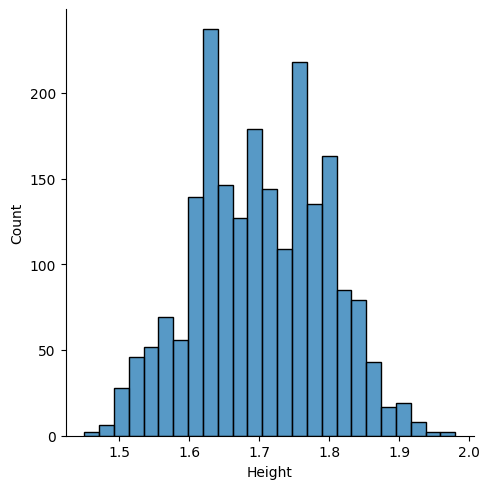

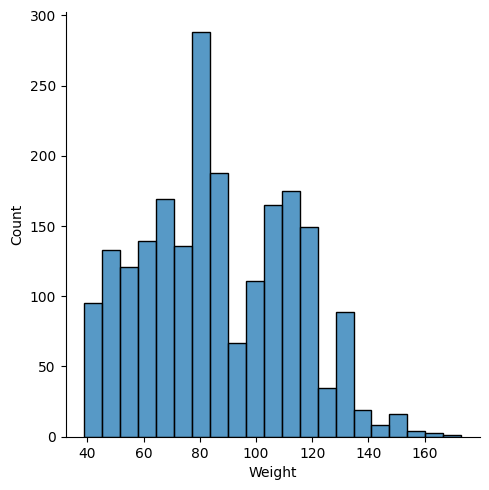

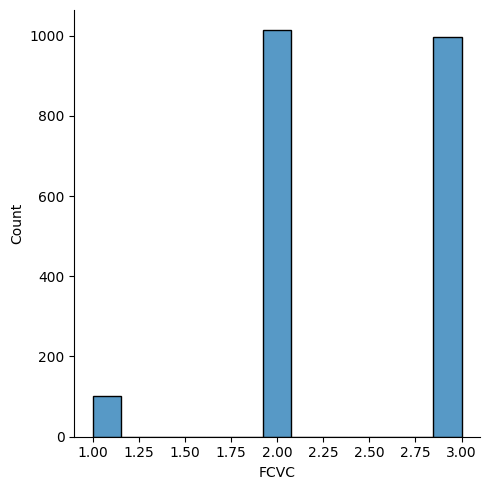

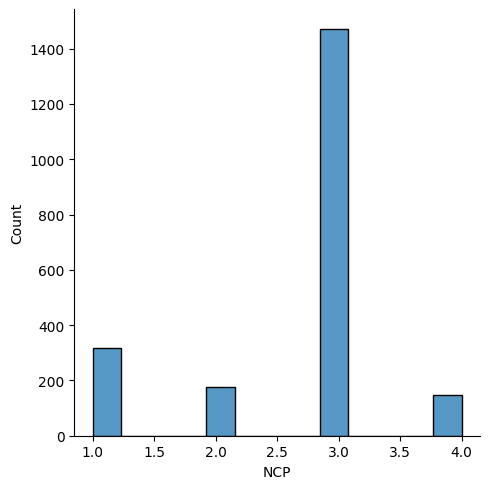

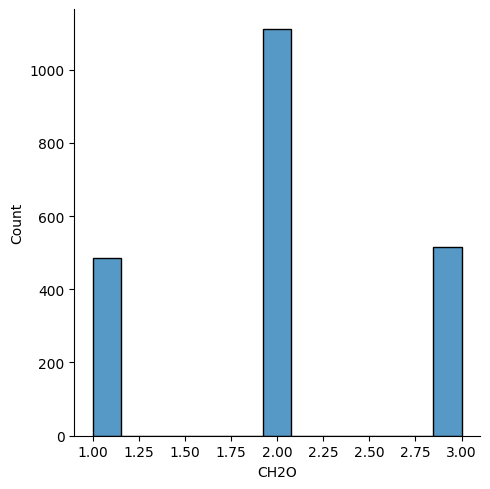

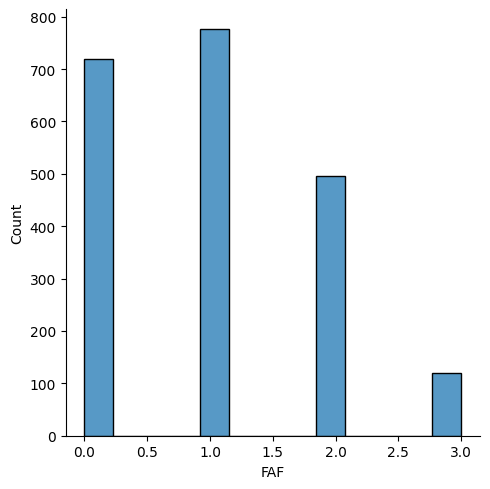

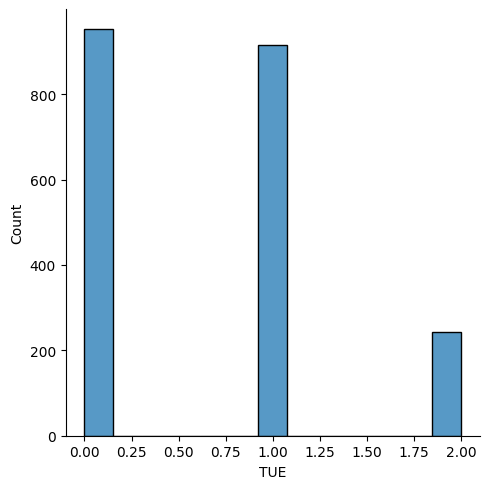

In [35]:
for i in list(df.select_dtypes(exclude = ['object']).columns)[1:]:
    distplots(i)

C:\Users\amins\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


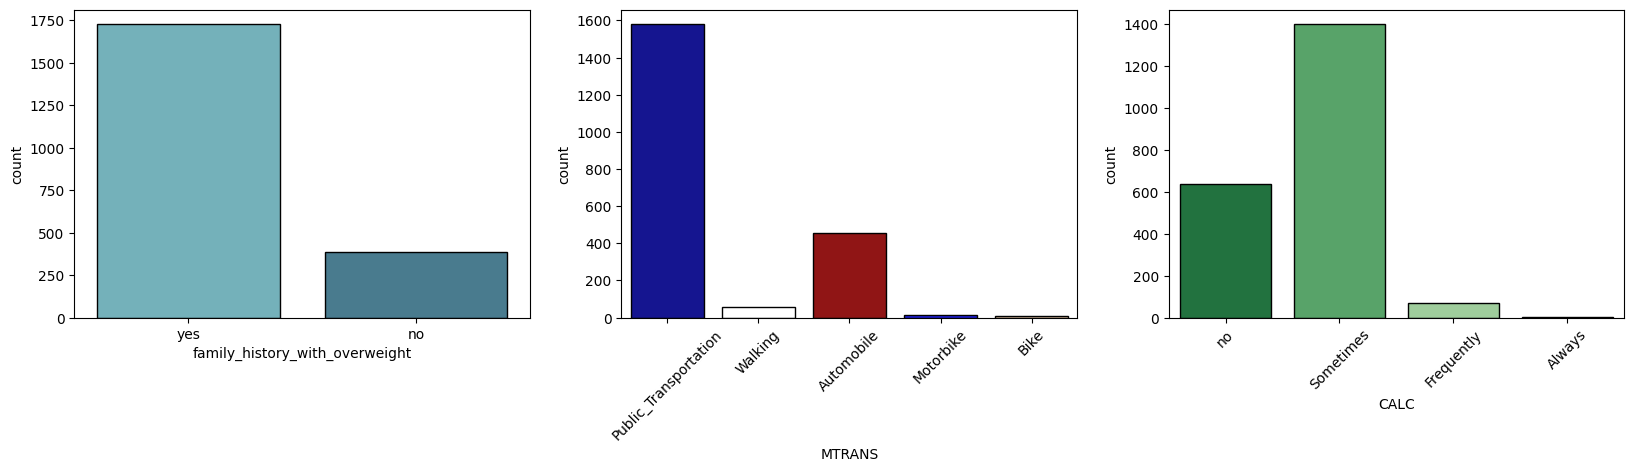

In [36]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sn.countplot(x = "family_history_with_overweight", data = df, palette = 'GnBu_d', edgecolor='black')
plt.subplot(132)
sn.countplot('MTRANS', data = df, palette = 'flag', edgecolor= 'black')
plt.xticks(rotation=45)
plt.subplot(133)
sn.countplot(x='CALC', data = df, palette = 'Greens_r', edgecolor = "black")
plt.xticks(rotation=45)
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = encoder.fit_transform(df['FAVC'])
df['CAEC'] = encoder.fit_transform(df['CAEC'])
df['SMOKE'] = encoder.fit_transform(df['SMOKE'])
df['SCC'] = encoder.fit_transform(df['SCC'])
df['CALC'] = encoder.fit_transform(df['CALC'])
df['MTRANS'] = encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])

In [38]:
X = df.drop(['NObeyesdad'], axis = 1)
y = df['NObeyesdad']

In [39]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21,1.62,64.0,1,0,2,3,2,0,2.0,0,0,1,3,3
1,0,21,1.52,56.0,1,0,3,3,2,1,3.0,1,3,0,2,3
2,1,23,1.80,77.0,1,0,2,3,2,0,2.0,0,2,1,1,3
3,1,27,1.80,87.0,0,0,3,3,2,0,2.0,0,2,0,1,4
4,1,22,1.78,89.8,0,0,2,1,2,0,2.0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.4,1,1,3,3,2,0,2.0,0,2,1,2,3
2107,0,22,1.75,133.7,1,1,3,3,2,0,2.0,0,1,1,2,3
2108,0,23,1.75,133.7,1,1,3,3,2,0,2.0,0,1,1,2,3
2109,0,24,1.74,133.3,1,1,3,3,2,0,3.0,0,1,1,2,3


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn. svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler


def model_predict(X_train, y_train, X_test, y_test):
    
    models = [
        ('Random Forest', RandomForestClassifier()),
        ("Decision Tree", DecisionTreeClassifier()),
        ('SVM', SVC())
    ]
    
    for name, model in models:
        #unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        #accuracy score
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        
        #ourtput
        print(name + ":")
        print("-"*30)
        print("Accuracy: ", accuracy)      
        
        print("\nCalassification Report : \n", metrics.classification_report(y_test, y_pred))
        print("     ----------------------------------      \n")
       

In [42]:
model_predict(X_train, y_train, X_test, y_test)

Random Forest:
------------------------------
Accuracy:  0.93218

Calassification Report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        92
           1       0.79      0.83      0.81        77
           2       0.99      0.96      0.97       114
           3       0.98      1.00      0.99        85
           4       1.00      1.00      1.00        92
           5       0.93      0.84      0.88        89
           6       0.90      0.92      0.91        85

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

     ----------------------------------      

Decision Tree:
------------------------------
Accuracy:  0.95584

Calassification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        92
           1       0.92      0.91      0.92        77
       